<a href="https://colab.research.google.com/github/omyahro/Data_200_Royals/blob/main/ORoyals_Commit07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
pip install sqlite-database

In [32]:
# Import the libraries
import sqlite3
import csv
import numpy as np
import pandas as pd

In [33]:
# 1. Load dataset (uploaded file path)
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path
file_path = "/content/drive/My Drive/Food_Access_Research_Atlas.csv"

# Read the Excel file
food_access = pd.read_csv(file_path)
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:

conn = sqlite3.connect('food_access.db')  # or use full path if needed
cur = conn.cursor()


In [35]:
conn = sqlite3.connect('/content/drive/My Drive/food_access.db')
df.to_sql('food_access', conn, if_exists='replace', index=False)

72531

In [48]:
# Create a cursor to interact with the database.
cur.execute('DROP TABLE BlackAthletes')

In [61]:
# Create a new table
cur.execute('''
    CREATE TABLE IF NOT EXISTS BlackAthletes (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT,
        sport TEXT,
        country TEXT,
        olympic_medals INTEGER
    )
''')

conn.commit()

In [50]:
cur.execute('''
    INSERT INTO BlackAthletes (name, sport, country, olympic_medals)
    VALUES ('Michael Jordan', 'Basketball', 'USA', 2)
''')
conn.commit()

In [51]:
cur.execute('''
    INSERT INTO BlackAthletes (name, sport, country, olympic_medals)
    VALUES ('Michael Jordan', 'Basketball', 'USA', 2)
''')
conn.commit()

In [52]:
data = [
    ("Serena Williams", "Tennis", "USA", 4),
    ("LeBron James", "Basketball", "USA", 2),
    ("Simone Biles", "Gymnastics", "USA", 7),
    ("Usain Bolt", "Track & Field", "Jamaica", 8),
    ("Wilma Rudolph", "Track & Field", "USA", 3),
    ("Muhammad Ali", "Boxing", "USA", 1),
    ("Naomi Osaka", "Tennis", "Japan", 0),
    ("Pelé", "Soccer", "Brazil", 0),  # World Cups, not Olympics
    ("Allyson Felix", "Track & Field", "USA", 11),
    ("Jackie Robinson", "Baseball", "USA", 0)
]

# Insert data into the table
cur.executemany('''
    INSERT INTO BlackAthletes (name, sport, country, olympic_medals)
    VALUES (?, ?, ?, ?)
''', data)

conn.commit()

In [54]:
cur.execute('''
SELECT *
FROM BlackAthletes;''')

cur.fetchall()

[(1, 'Michael Jordan', 'Basketball', 'USA', 2),
 (2, 'Michael Jordan', 'Basketball', 'USA', 2),
 (3, 'Serena Williams', 'Tennis', 'USA', 4),
 (4, 'LeBron James', 'Basketball', 'USA', 2),
 (5, 'Simone Biles', 'Gymnastics', 'USA', 7),
 (6, 'Usain Bolt', 'Track & Field', 'Jamaica', 8),
 (7, 'Wilma Rudolph', 'Track & Field', 'USA', 3),
 (8, 'Muhammad Ali', 'Boxing', 'USA', 1),
 (9, 'Naomi Osaka', 'Tennis', 'Japan', 0),
 (10, 'Pelé', 'Soccer', 'Brazil', 0),
 (11, 'Allyson Felix', 'Track & Field', 'USA', 11),
 (12, 'Jackie Robinson', 'Baseball', 'USA', 0)]

In [55]:
cur.execute('''

SELECT DISTINCT name, sport, country, olympic_medals
FROM BlackAthletes;''')

cur.fetchall()


[('Michael Jordan', 'Basketball', 'USA', 2),
 ('Serena Williams', 'Tennis', 'USA', 4),
 ('LeBron James', 'Basketball', 'USA', 2),
 ('Simone Biles', 'Gymnastics', 'USA', 7),
 ('Usain Bolt', 'Track & Field', 'Jamaica', 8),
 ('Wilma Rudolph', 'Track & Field', 'USA', 3),
 ('Muhammad Ali', 'Boxing', 'USA', 1),
 ('Naomi Osaka', 'Tennis', 'Japan', 0),
 ('Pelé', 'Soccer', 'Brazil', 0),
 ('Allyson Felix', 'Track & Field', 'USA', 11),
 ('Jackie Robinson', 'Baseball', 'USA', 0)]

In [56]:
cur.execute('''
    DELETE FROM BlackAthletes
    WHERE olympic_medals = 0
''')

cur.execute('''
SELECT *
FROM BlackAthletes;
''')


cur.fetchall()

[(1, 'Michael Jordan', 'Basketball', 'USA', 2),
 (2, 'Michael Jordan', 'Basketball', 'USA', 2),
 (3, 'Serena Williams', 'Tennis', 'USA', 4),
 (4, 'LeBron James', 'Basketball', 'USA', 2),
 (5, 'Simone Biles', 'Gymnastics', 'USA', 7),
 (6, 'Usain Bolt', 'Track & Field', 'Jamaica', 8),
 (7, 'Wilma Rudolph', 'Track & Field', 'USA', 3),
 (8, 'Muhammad Ali', 'Boxing', 'USA', 1),
 (11, 'Allyson Felix', 'Track & Field', 'USA', 11)]

In [57]:
cur.execute('''
SELECT *
    FROM BlackAthletes
    WHERE sport = "NULL";
''')

cur.fetchall()

[]

In [58]:
cur.execute('''
    SELECT * FROM BlackAthletes
    WHERE country = 'USA' AND olympic_medals >= 5
''')

cur.fetchall()

[(5, 'Simone Biles', 'Gymnastics', 'USA', 7),
 (11, 'Allyson Felix', 'Track & Field', 'USA', 11)]

In [59]:
cur.execute('''
SELECT *
    FROM BlackAthletes
    WHERE olympic_medals BETWEEN 2 AND 6;
''')

cur.fetchall()

[(1, 'Michael Jordan', 'Basketball', 'USA', 2),
 (2, 'Michael Jordan', 'Basketball', 'USA', 2),
 (3, 'Serena Williams', 'Tennis', 'USA', 4),
 (4, 'LeBron James', 'Basketball', 'USA', 2),
 (7, 'Wilma Rudolph', 'Track & Field', 'USA', 3)]

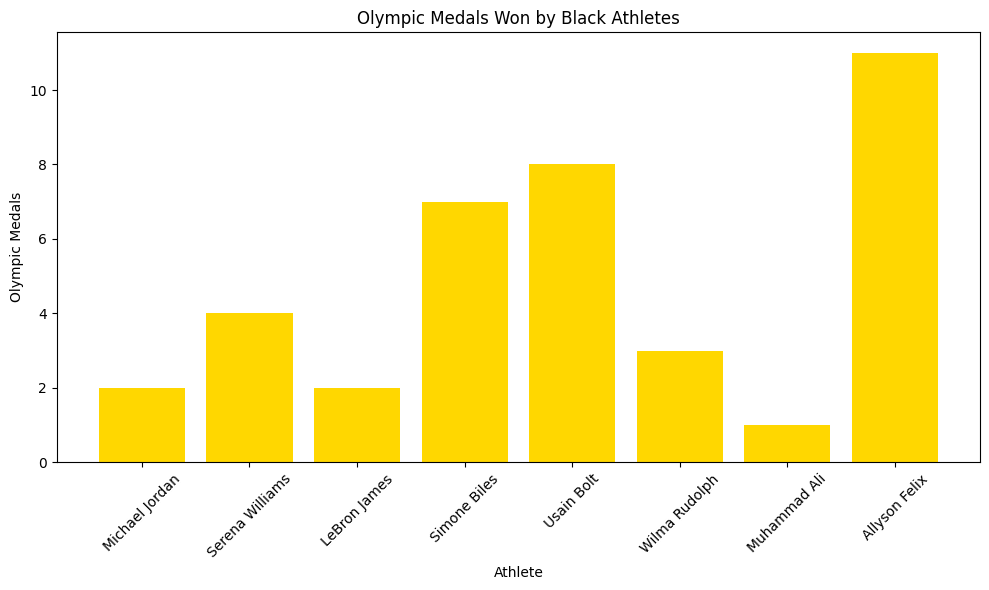

In [64]:
import matplotlib.pyplot as plt

cur.execute("SELECT name, olympic_medals FROM BlackAthletes")
data = cur.fetchall()

names = [row[0] for row in data]
medals = [row[1] for row in data]

plt.figure(figsize=(10, 6))
plt.bar(names, medals, color='gold')
plt.title('Olympic Medals Won by Black Athletes')
plt.xlabel('Athlete')
plt.ylabel('Olympic Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()